**Elementary First-Order Scalar ODE**

Equation:

   \begin{equation*}
        \frac{du}{dt} = au.
    \end{equation*}

- $a \in \mathbb{R}$ is a real constant.
- $u(t)$ is the unknown scalar function.
- Solution follows an exponential form.

General Solution:

   \begin{equation*}
        u(t) = ce^{at}.
    \end{equation*}

- $c$ is the integration constant.
- Derived using separation of variables.

Initial Condition:

Given:
    \begin{equation*}
        u(t_0) = b.
    \end{equation*}

- Unique solution determined by $b$.
- Substituting $t = t_0$ into the general solution:

    \begin{equation*}
        b = ce^{a t_0} \Rightarrow c = b e^{-a t_0}.
    \end{equation*}
    
Final and Unique Solution:



   \begin{equation*}
        u(t) = b e^{a(t - t_0)}.
    \end{equation*}

- This represents the unique solution to the initial value problem.
- Exponential growth if $a > 0$, decay if $a < 0$.

**Definition:**
    A first-order dynamical system consists of a system of $n$ coupled first-order ordinary differential equations:
 
   \begin{equation*}
        \frac{du_1}{dt} = f_1(t, u_1, ..., u_n), \quad ... \quad \frac{du_n}{dt} = f_n(t, u_1, ..., u_n).
    \end{equation*}

- The unknowns are the $n$ scalar functions $u_1(t), ..., u_n(t)$.
- The system describes evolution over time ($t \in \mathbb{R}$).

Vector Form Representation:

- We write the system in vector form:

     \begin{equation*}
            \frac{du}{dt} = f(t, u),
        \end{equation*}
        where:
$$
u(t) = (u_1(t), ..., u_n(t))^T
$$
        is the vector-valued solution.
- This representation parameterizes a curve in $\mathbb{R}^n$.
- The function $f(t, u)$ has components $f_i(t, u_1, ..., u_n)$ for $i = 1, ..., n$.


Autonomous Systems:

- A system is autonomous if the function $f$ does not explicitly depend on $t$:

     \begin{equation*}
            \frac{du}{dt} = f(u).
        \end{equation*}
        
- Autonomous systems arise in many applications, including physics, biology, and economics.

Linear Autonomous Dynamical Systems

Linear Systems:

- Matrix formulation:

     \begin{equation*}
            \frac{du}{dt} = A u,
        \end{equation*}
        
     where $A$ is a constant $n\times n$ matrix.
- This system represents linear evolution with constant coefficients.

**Exponential Solution:**

- Seeking a solution of the form:

     \begin{align*}
            u(t) = e^{\lambda t} v,
        \end{align*}
        
     where $\lambda$ is a scalar and $v$ is a constant vector.
- Differentiating:

     \begin{align*}
            \frac{du}{dt} = \lambda e^{\lambda t} v.
        \end{align*}
        
- Substituting into the system:

     \begin{align*}
            \lambda e^{\lambda t} v = e^{\lambda t} A v.
        \end{align*}
- Canceling $e^{\lambda t}$:

     \begin{align*}
            \lambda v = A v.
        \end{align*}
       
This is the eigenvalue equation.

**Eigenvalues and Eigenvectors:**

Definition: Let $A$ be an $n \times n$ matrix. A scalar $\lambda$ is called an eigenvalue of $A$ if there exists a nonzero vector $v \neq 0$, called an eigenvector, such that:

\begin{equation*}
Av = \lambda v.
\end{equation*}

Geometric Interpretation:

- The matrix $A$ scales the eigenvector $v$ by a factor of $\lambda$.
- The eigenvector's direction remains unchanged under this transformation.


**Reformulating the Eigenvalue equation:**

Rewriting the equation:

\begin{equation*}
(A - \lambda I)v = 0,
\end{equation*}

where $I$ is the identity matrix.

- This is a homogeneous linear system.
- A nontrivial solution exists only if $A - \lambda I$ is singular.

**Theorem 8.3: Eigenvalue Criterion:**

A scalar $\lambda$ is an eigenvalue of an $n \times n$ matrix $A$ if and only if the matrix $A - \lambda I$ is singular.

- This means $\text{rank}(A - \lambda I) < n$.
- The corresponding eigenvectors satisfy $(A - \lambda I)v = 0$.

**Characteristic equation:**

A scalar $\lambda$ is an eigenvalue of $A$ if and only if it satisfies the characteristic equation:

\begin{equation*}
\det(A - \lambda I) = 0.
\end{equation*}

To compute eigenvalues and eigenvectors manually:

- Solve $\det(A - \lambda I) = 0$ for $\lambda$.
- For each eigenvalue $\lambda$, solve $(A - \lambda I)v = 0$ for $v$.


Enter the size of the square matrix A (e.g. 2 or 3): 2
Enter each row of matrix A (numbers separated by spaces):
Row 1: 4 2
Row 2: 1 3

Matrix A:
[[4. 2.]
 [1. 3.]]

Eigenvalues:
[5. 2.]

Eigenvectors:
[[ 0.89442719 -0.70710678]
 [ 0.4472136   0.70710678]]

--- Stability Analysis ---
λ1 = 5.0000 → Unstable (grows over time)
λ2 = 2.0000 → Unstable (grows over time)


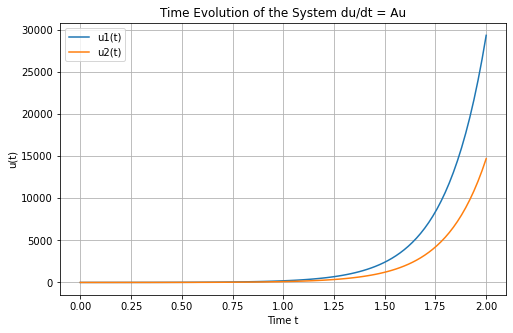

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm

# --- Step 1: Input matrix A ---
n = int(input("Enter the size of the square matrix A (e.g. 2 or 3): "))
A = np.zeros((n, n))
print("Enter each row of matrix A (numbers separated by spaces):")
for i in range(n):
    row = input(f"Row {i+1}: ").strip().split()
    A[i, :] = [float(x) for x in row]

print("\nMatrix A:")
print(A)

# --- Step 2: Eigen decomposition ---
eigvals, eigvecs = np.linalg.eig(A)
print("\nEigenvalues:")
print(eigvals)
print("\nEigenvectors:")
print(eigvecs)

# --- Step 3: Stability check ---
print("\n--- Stability Analysis ---")
for i, val in enumerate(eigvals):
    if np.real(val) < 0:
        print(f"λ{i+1} = {val:.4f} → Stable (decays over time)")
    elif np.real(val) > 0:
        print(f"λ{i+1} = {val:.4f} → Unstable (grows over time)")
    else:
        print(f"λ{i+1} = {val:.4f} → Neutral (oscillates or constant)")

# --- Step 4: Simulate time evolution ---
t_values = np.linspace(0, 2, 100)  # time from 0 to 2 seconds
u0 = np.ones((n, 1))               # initial condition u(0) = [1, 1, ...]^T

solutions = []
for t in t_values:
    u_t = expm(A * t) @ u0
    solutions.append(u_t.flatten())

solutions = np.array(solutions)

# --- Step 5: Plot ---
plt.figure(figsize=(8, 5))
for i in range(n):
    plt.plot(t_values, solutions[:, i], label=f'u{i+1}(t)')
plt.xlabel("Time t")
plt.ylabel("u(t)")
plt.title("Time Evolution of the System du/dt = Au")
plt.legend()
plt.grid(True)
plt.show()


**Conclusion**

- The existence of solutions is determined by the eigenvalues and eigenvectors of $A$.
- These solutions characterize the qualitative behavior of the system.
- Further study will explore stability and applications.
- First-order dynamical systems describe time evolution in various fields.
- The linear case is fundamental for stability analysis and system behavior.
- Eigenvalues of $A$ determine system stability.